In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [2]:
import requests
import json
import time
import pandas as pd
from functions.utils import extract_individual_player_features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

### Get market players 

I know that endpoint

In [5]:
AUTH_TOKEN = '5e65_20f468a19ad19ef73979642df99d6603'
USER_ID = '56c6b62085617f9b1dc7d061'
CHAMPIONSHIP_ID = '5f7b19924dcd043e8a092dd4'
USERTEAM_ID = '5f7b33ea6f9120324dedcb15'

headers = {
    'Authorization': f'Bearer {AUTH_TOKEN}',
    'x-futmondo-token': AUTH_TOKEN,
    'x-futmondo-userid': USER_ID}

In [25]:
import requests
import json 

# --- Your Authenticated Variables ---
AUTH_TOKEN = '5e65_20f468a19ad19ef73979642df99d6603'
USER_ID = '56c6b62085617f9b1dc7d061'
CHAMPIONSHIP_ID = '5f7b19924dcd043e8a092dd4'
USERTEAM_ID = '5f7b33ea6f9120324dedcb15'

headers = {
    'Authorization': f'Bearer {AUTH_TOKEN}',
    'x-futmondo-token': AUTH_TOKEN,
    'x-futmondo-userid': USER_ID
}

# --- The Endpoint (Assuming the Championship Endpoint) ---
# We will use the endpoint path that corresponds to the structure you showed in the image.
# Based on the JS logic, this is likely /5/league/championshipplayers
ENDPOINT_URL = 'https://api.futmondo.com/5/league/championshipplayers' 

query_params = {
    'championshipId': CHAMPIONSHIP_ID
    # No leagueAlias needed if this is the championship view
}

print(f"## 🚀 Fetching all players from: {ENDPOINT_URL}")

# --- Make the Request ---
try:
    response = requests.post(
        ENDPOINT_URL,
        headers=headers,
        json={'query': query_params}
    )

    # --- Process the Response ---
    if response.status_code == 200:
        full_response = response.json()
        
        # --- CRITICAL STEP: Extracting the Data based on your image ---
        # The player list is under 'answer' -> 'players'
        player_list = full_response.get('answer', {}).get('players')
        
        # Verification
        if isinstance(player_list, list):
            print(f"✅ Success! Extracted **{len(player_list)}** player records.")
            
            # Displaying the first player's keys for confirmation
            if player_list:
                print("\n### 🔑 Sample Player Keys (Data Structure):")
                print(json.dumps(list(player_list[0].keys()), indent=4))
            
            # Now you can use this player_list in your notebook for further analysis.
            # Example: print(player_list[0]['name']) 

        else:
            print("❌ Error: Player list not found in the expected 'answer' -> 'players' structure.")
            print(f"Top-level response keys: {list(full_response.keys())}")

    else:
        print(f"❌ Error fetching players data.")
        print(f"Status code: **{response.status_code}**")
        print(f"Response text (first 500 chars): {response.text[:500]}...")

except requests.exceptions.RequestException as e:
    print(f"An error occurred during the request: {e}")

## 🚀 Fetching all players from: https://api.futmondo.com/5/league/championshipplayers
✅ Success! Extracted **519** player records.

### 🔑 Sample Player Keys (Data Structure):
[
    "id",
    "name",
    "slug",
    "role",
    "role2",
    "photo",
    "points",
    "value",
    "status",
    "rating",
    "computer",
    "dbp",
    "average",
    "change",
    "teamId",
    "fav"
]


In [ ]:
player_list

[{'id': '51ffb2540ac2ec8b0700001e',
  'name': 'Dani Rodríguez',
  'slug': '1509441',
  'role': 'centrocampista',
  'role2': '',
  'photo': '1509441.png',
  'points': 4,
  'value': 1000000,
  'status': '',
  'rating': 1,
  'computer': True,
  'dbp': True,
  'average': {'average': 2,
   'homeAverage': 2,
   'awayAverage': 0,
   'averageLastFive': 0,
   'matches': 2,
   'fitness': [0, 0, 0, 0, 0]},
  'change': 0,
  'teamId': '504e581e4d8bec9a670000d2',
  'fav': False},
 {'id': '52013ee178b20d7f07000351',
  'name': 'Josan',
  'slug': '67093858',
  'role': 'centrocampista',
  'role2': '',
  'photo': '67093858.png',
  'points': 25,
  'value': 1000000,
  'status': '',
  'rating': 1,
  'computer': True,
  'dbp': True,
  'average': {'average': 3.5714285714285716,
   'homeAverage': 4.4,
   'awayAverage': 1.5,
   'averageLastFive': 1.4,
   'matches': 7,
   'fitness': [0, 5, 0, 0, 2]},
  'change': 0,
  'teamId': '51b889b1e401a15f2c0000f0',
  'fav': False},
 {'id': '521a999b5865e5687000001c',
  'na

In [30]:
# STEP 1: Get all player IDs from market
response = requests.post(
    'https://api.futmondo.com/1/market/players',
    headers=headers,
    json={'query': {
        'championshipId': CHAMPIONSHIP_ID,
        'userteamId': USERTEAM_ID}})

market_data = response.json()
all_players = market_data['answer']

# STEP 2: Get detailed data for each player
detailed_players = []

for i, player in enumerate(all_players):
    player_id = player['id']
    player_name = player['name']
    
    print(f"{i+1}/{len(all_players)}: {player_name}...")
    
    response = requests.post(
        'https://api.futmondo.com/1/player/summary',
        headers=headers,
        json={'query': {
            'playerId': player_id,
            'championshipId': CHAMPIONSHIP_ID
        }}
    )
    
    if response.status_code == 200:
        detailed_players.append(response.json())
    
    time.sleep(0.5)  # Don't spam the API

1/18: Cervi...
2/18: Dani Calvo...
3/18: Christensen...
4/18: Rosier...
5/18: Diego López...
6/18: Ángel Ortiz...
7/18: Güler...
8/18: De Jong...
9/18: Primo...
10/18: Javi Galán...
11/18: Kervin Arriaga...
12/18: Mendy...
13/18: Raba...
14/18: Sannadi...
15/18: Álex Moreno...
16/18: Pickel...
17/18: Oluwaseyi...
18/18: Ounahi...


In [33]:
# Save everything
with open('../data/detailed_scrapped/all_detailed_players_def.json', 'w', encoding='utf-8') as f:
    json.dump(player_list, f, indent=2, ensure_ascii=False)

### Get all players features

In [4]:
# Usage
with open('data/all_detailed_players.json', 'r') as f:
    json_array = json.load(f)

rows = [extract_individual_player_features(item) for item in json_array]
df_features_1 = pd.DataFrame(rows)
# df_features.to_csv('players_dataset.csv', index=False)

In [5]:
df_features_1

,player_id,name,team,role,total_points,matches_played,average,home_average,away_average,last_5_average,...,is_home_next,opponent_next,team_win_prob,draw_prob,opponent_win_prob,match_minus_1,match_minus_2,match_minus_3,match_minus_4,match_minus_5
0,504e58bb4d8bec9a67000187,Koke,Atlético de Madrid,centrocampista,61,12,5.083333,5.833333,4.333333,4.4,...,True,R. Oviedo,79.894209,13.554466,6.551325,2,5,5,8,2
1,55a975025bcb491d02476ab2,Álvaro Lemos,R. Oviedo,defensa,0,0,0.000000,0.000000,0.000000,0.0,...,False,Atlético de Madrid,6.551325,13.554466,79.894209,0,0,0,0,0
2,505d8a247e438909310001c5,Rubén García,Osasuna,delantero,31,11,2.818182,3.800000,2.000000,3.0,...,False,Mallorca,28.899142,30.995926,40.104932,2,3,3,6,1
3,610174c4bc32266071ced17a,Oriol Rey,Levante,centrocampista,33,10,3.300000,3.666667,3.142857,0.6,...,True,Athletic de Bilbao,27.777874,28.169111,44.053015,3,0,0,0,0
4,64a6fcb014cd337373737ba9,Güler,Real Madrid,centrocampista,92,13,7.076923,5.833333,8.142857,5.8,...,False,Girona,70.055207,17.422425,12.522368,3,7,7,3,9
5,657cccb79a154503e6fa2fa8,Rodri Mendoza,Elche,centrocampista,49,9,5.444444,6.800000,3.750000,3.0,...,False,Getafe,24.876405,32.135422,42.988174,0,3,4,4,4
6,6593da11751ea070478c47cc,Cardoso,Atlético de Madrid,centrocampista,10,3,3.333333,3.000000,3.500000,0.0,...,True,R. Oviedo,79.894209,13.554466,6.551325,0,0,0,0,0
7,5b644bc71281445662affdfb,Domingos Duarte,Getafe,defensa,40,11,3.636364,3.600000,3.666667,4.2,...,True,Elche,42.988174,32.135422,24.876405,2,3,5,6,5
8,62e58d3e11f4242dbd72531a,Salinas,Espanyol,defensa,5,6,0.833333,1.000000,0.500000,0.4,...,False,Celta de Vigo,24.635835,27.758687,47.605478,0,0,0,2,0
9,504e58bb4d8bec9a6700017a,Courtois,Real Madrid,portero,67,13,5.153846,4.666667,5.571429,6.2,...,False,Girona,70.055207,17.422425,12.522368,6,6,6,5,8


In [6]:
with open('data/all_detailed_players_2.json', 'r') as f:
    json_array = json.load(f)

rows = [extract_individual_player_features(item) for item in json_array]
df_features_2 = pd.DataFrame(rows)

In [7]:
with open('data/all_detailed_players_3.json', 'r') as f:
    json_array = json.load(f)

rows = [extract_individual_player_features(item) for item in json_array]
df_features_3 = pd.DataFrame(rows)

In [8]:
# Concatenate all dataframes
df_features = pd.concat([df_features_1, df_features_2, df_features_3], ignore_index=True)

# Keep last occurrence (most recent) for each player_id
df_features.drop_duplicates(subset='player_id', keep='last', inplace=True)

# Reset index after dropping duplicates
df_features.reset_index(drop=True, inplace=True)

In [9]:
df_features

,player_id,name,team,role,total_points,matches_played,average,home_average,away_average,last_5_average,...,is_home_next,opponent_next,team_win_prob,draw_prob,opponent_win_prob,match_minus_1,match_minus_2,match_minus_3,match_minus_4,match_minus_5
0,504e58bb4d8bec9a67000187,Koke,Atlético de Madrid,centrocampista,61,12,5.083333,5.833333,4.333333,4.4,...,True,R. Oviedo,79.894209,13.554466,6.551325,2,5,5,8,2
1,55a975025bcb491d02476ab2,Álvaro Lemos,R. Oviedo,defensa,0,0,0.000000,0.000000,0.000000,0.0,...,False,Atlético de Madrid,6.551325,13.554466,79.894209,0,0,0,0,0
2,505d8a247e438909310001c5,Rubén García,Osasuna,delantero,31,11,2.818182,3.800000,2.000000,3.0,...,False,Mallorca,28.899142,30.995926,40.104932,2,3,3,6,1
3,610174c4bc32266071ced17a,Oriol Rey,Levante,centrocampista,33,10,3.300000,3.666667,3.142857,0.6,...,True,Athletic de Bilbao,27.777874,28.169111,44.053015,3,0,0,0,0
4,657cccb79a154503e6fa2fa8,Rodri Mendoza,Elche,centrocampista,49,9,5.444444,6.800000,3.750000,3.0,...,False,Getafe,24.876405,32.135422,42.988174,0,3,4,4,4
5,6593da11751ea070478c47cc,Cardoso,Atlético de Madrid,centrocampista,10,3,3.333333,3.000000,3.500000,0.0,...,True,R. Oviedo,79.894209,13.554466,6.551325,0,0,0,0,0
6,5b644bc71281445662affdfb,Domingos Duarte,Getafe,defensa,40,11,3.636364,3.600000,3.666667,4.2,...,True,Elche,42.988174,32.135422,24.876405,2,3,5,6,5
7,62e58d3e11f4242dbd72531a,Salinas,Espanyol,defensa,5,6,0.833333,1.000000,0.500000,0.4,...,False,Celta de Vigo,24.635835,27.758687,47.605478,0,0,0,2,0
8,504e58bb4d8bec9a6700017a,Courtois,Real Madrid,portero,67,13,5.153846,4.666667,5.571429,6.2,...,False,Girona,70.055207,17.422425,12.522368,6,6,6,5,8
9,5b786a5d95ea0b2b07e4e66e,Morlanes,Mallorca,centrocampista,22,11,2.000000,1.800000,2.166667,2.0,...,True,Osasuna,40.104932,30.995926,28.899142,0,1,1,5,3


In [10]:
df_features.to_csv('data/player_features.csv', index=False)

### Training data

In [63]:
# List to store all training samples
all_samples = []

# Loop through all players
for player_data in detailed_players:
    answer = player_data['answer']
    player_info = answer['data']
    
    historical_matches = answer.get('points', [])
    if len(historical_matches) < 4:
        continue
    
    # Extract price history for max and min
    prices = [p['price'] for p in answer['prices']]
    max_price = max(prices)
    min_price = min(prices)
    
    # Create sliding windows of 4 matches (3 for features, 1 for target)
    for i in range(len(historical_matches) - 3):
        match_window = historical_matches[i:i+4]
        feature_matches = match_window[:3]
        target_match = match_window[3]
        
        feature_points = [m['points'] for m in feature_matches]
        last_3_average = sum(feature_points) / 3
        
        # Get home/away averages from overall player stats
        home_average = player_info['average']['homeAverage']
        away_average = player_info['average']['awayAverage']
        is_home_target = target_match['isHomeTeam']
        target_points = target_match['points']
        round_number = target_match['round']
        
        # Create sample dictionary
        sample_dict = {
            'player_id': player_info['id'],
            'name': player_info['name'],
            'team': player_info['team'],
            'role': player_info['role'],
            'round': round_number,
            'home_average': home_average,
            'away_average': away_average,
            'overall_average': player_info['average']['average'],
            'last_3_average': last_3_average,
            'current_price': player_info['value'],
            'max_price': max_price,
            'min_price': min_price,
            'is_home_target': is_home_target,
            'match_minus_1': feature_matches[2]['points'],
            'match_minus_2': feature_matches[1]['points'],
            'match_minus_3': feature_matches[0]['points'],
            'target_points': target_points}
        all_samples.append(sample_dict)

df = pd.DataFrame(all_samples)

In [64]:
# df.to_csv('training_data.csv', index=False)
# print("\n✅ Training data saved to 'training_data.csv'")

In [65]:
df.head(2)

,player_id,name,team,role,round,home_average,away_average,overall_average,last_3_average,current_price,max_price,min_price,is_home_target,match_minus_1,match_minus_2,match_minus_3,target_points
0,574dc94bb9278bf5518b1e7b,Budimir,Osasuna,delantero,4,5.5,3.0,4.153846,6.000000,40671928,41596597,40631488,True,3,12,3,2
1,574dc94bb9278bf5518b1e7b,Budimir,Osasuna,delantero,5,5.5,3.0,4.153846,5.666667,40671928,41596597,40631488,False,2,3,12,9


### Model Prediction

In [66]:
# Load training data
df = pd.read_csv('training_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'training_data.csv'

In [68]:
# Features for the model
feature_columns = [
    'home_average', 'away_average', 'overall_average',
    'last_3_average', 'current_price', 'max_price', 'min_price',
    'is_home_target', 'match_minus_1', 'match_minus_2', 'match_minus_3']

df['is_home_target'] = df['is_home_target'].astype(int)

# Prepare X (features) and y (target)
X = df[feature_columns]
y = df['target_points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== TRAIN MODEL =====
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42)
model.fit(X_train, y_train)

# ===== EVALUATE MODEL =====
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n✅ MODEL PERFORMANCE:")
print(f"Mean Absolute Error: {mae:.2f} points")
print(f"Root Mean Squared Error: {rmse:.2f} points")
print(f"R² Score: {r2:.3f}")

# ===== FEATURE IMPORTANCE =====
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 FEATURE IMPORTANCE:")
print(feature_importance)

# ===== PREDICT NEXT MATCHES =====
df_current = pd.read_csv('data/player_features.csv')

# Prepare features for prediction (using last 5 matches as last 3)
predict_features = pd.DataFrame({
    'home_average': df_current['home_average'],
    'away_average': df_current['away_average'],
    'overall_average': df_current['average'],
    'last_3_average': df_current['last_5_average'],
    'current_price': df_current['current_price'],
    'max_price': df_current['max_price'],
    'min_price': df_current['min_price'],
    'is_home_target': df_current['is_home_next'].astype(int),
    'match_minus_1': df_current['match_minus_1'],
    'match_minus_2': df_current['match_minus_2'],
    'match_minus_3': df_current['match_minus_3']})

df_current['predicted_points_ml'] = model.predict(predict_features)
results = df_current[['name', 'team', 'role', 'is_home_next', 
                       'last_5_average', 'team_win_prob', 'predicted_points_ml']].copy()
results['predicted_points_ml'] = results['predicted_points_ml'].round(2)


✅ MODEL PERFORMANCE:
Mean Absolute Error: 1.87 points
Root Mean Squared Error: 2.59 points
R² Score: 0.225

📊 FEATURE IMPORTANCE:
            feature  importance
9     match_minus_2    0.167996
8     match_minus_1    0.159899
3    last_3_average    0.139579
2   overall_average    0.135916
1      away_average    0.101941
0      home_average    0.089334
10    match_minus_3    0.084036
6         min_price    0.037088
7    is_home_target    0.029788
4     current_price    0.027434
5         max_price    0.026989


In [69]:
# # Save predictions
# df_current.to_csv('ml_predictions.csv', index=False)
# print("\n✅ Predictions saved to 'ml_predictions.csv'")

📊 Evaluation plot saved to 'model_evaluation.png'


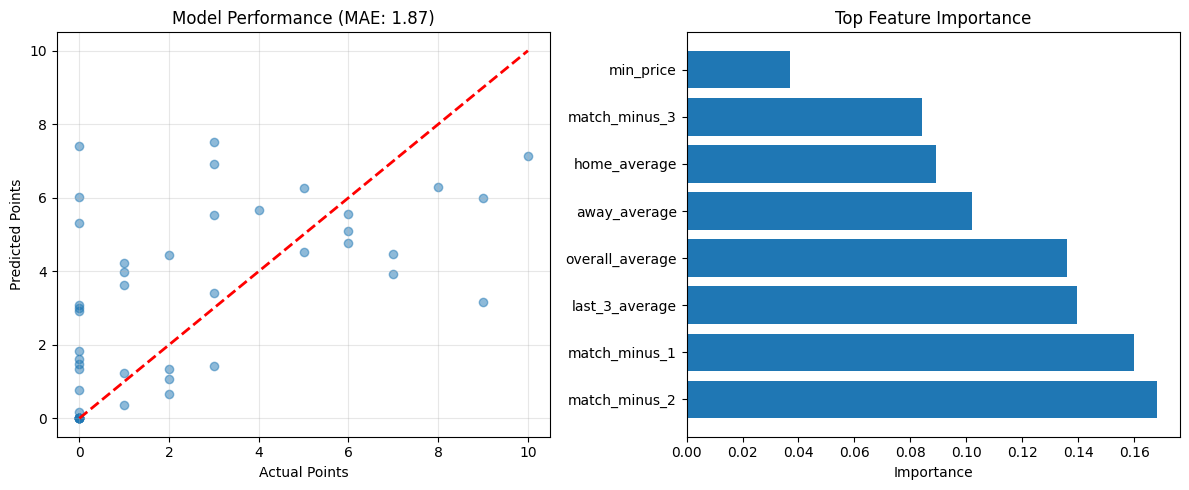

In [70]:
# ===== VISUALIZATION =====
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title(f'Model Performance (MAE: {mae:.2f})')
plt.grid(True, alpha=0.3)

# Plot 2: Feature Importance
plt.subplot(1, 2, 2)
top_features = feature_importance.head(8)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.title('Top Feature Importance')
plt.tight_layout()
print("📊 Evaluation plot saved to 'model_evaluation.png'")
plt.show()